In [1]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [3]:
eps=1e-2
lam=1
k=11
NMCS=10000

In [4]:
f= lambda x,lam,k:(k-1)/x-lam#dp/dt=(k-1)/Θ-λを実装。今回はΘがxになっている

C:\Users\daima\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


<a list of 4 text.Text objects>

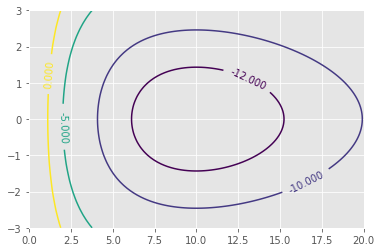

In [6]:
x,y=np.linspace(0,20,100),np.linspace(-3,3,100)
X,Y=np.meshgrid(x,y)
CS=plt.contour(X,Y,0.5*Y**2-(k-1)*np.log(x)+lam*x,levels=[-12,-10,-5,0])#meshgridで作ったX,YそれぞれにおけるHの値を出して等高線を作成する。
plt.clabel(CS,inline=1,fontsize=10)

In [12]:
def leap_flog(q,p,eps,lam,k,f):
    p_new=p+0.5*eps*f(q,lam,k)
    q_new=q+eps*p_new
    p_new=p_new+0.5*eps*f(q_new,lam,k)
    q,p=q_new,p_new
    return q,p

In [13]:
q,p=4.0,0
leap_flog_arr=np.zeros([NMCS,2])
leap_flog_arr[0,0]=q
leap_flog_arr[0,1]=p
for i in range(1,NMCS):
    q,p=leap_flog(q,p,eps,lam,k,f)
    leap_flog_arr[i,0]=q
    leap_flog_arr[i,1]=p
df_leap_flog=pd.DataFrame(leap_flog_arr,columns=["q","p"])

C:\Users\daima\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<a list of 4 text.Text objects>

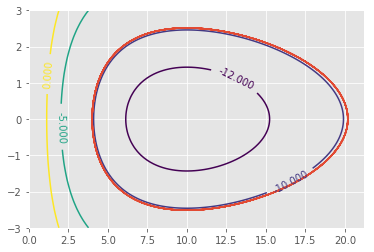

In [14]:
plt.plot(df_leap_flog["q"],df_leap_flog["p"])
CS=plt.contour(X,Y,0.5*Y**2-(k-1)*np.log(x)+lam*x,levels=[-12,-10,-5,0])#meshgridで作ったX,YそれぞれにおけるHの値を出して等高線を作成する。
plt.clabel(CS,inline=1,fontsize=10)